In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

# # 1. Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Checking for missing/null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# Since, no null values are there, Data cleaning is not happening.

In [8]:
# renaming the Columns
df.rename(columns = {'Category':'Type','Message':'Text'}, inplace=True)
df.sample(6)

,Type,Text
2159,ham,I think you should go the honesty road. Call t...
1220,ham,True. It is passable. And if you get a high sc...
737,ham,Thanks for looking out for me. I really apprec...
432,ham,Does she usually take fifteen fucking minutes ...
2822,ham,Oh god..taken the teeth?is it paining
2254,ham,Lol enjoy role playing much?


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['Type'] = encoder.fit_transform(df['Type'])

In [11]:
df.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Checking for duplicate values
df.duplicated().sum()

415

In [13]:
# removing duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5157, 2)

# # 2. EDA

In [16]:
df.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Type'].value_counts()

0    4516
1     641
Name: Type, dtype: int64

In [18]:
# Meaning 4516 are Hams and 641 are Spams

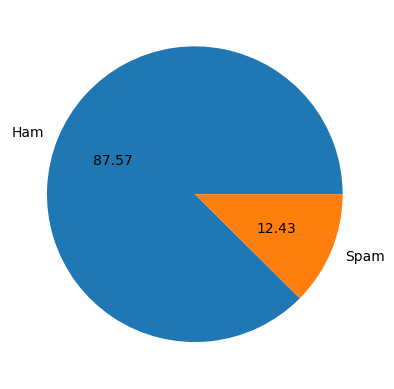

In [19]:
#Representing the above information in pie chart:

import matplotlib.pyplot as plt
plt.pie( df['Type'].value_counts(), labels=['Ham','Spam'], autopct= "%0.2f")
plt.show()

In [20]:
#Here, we can see the data is slightly imbalanced since Ham >> Spam

In [21]:
#Now, we will analyse how many characters, words and sentences are being used in the SMS/EMAIL 

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#Grouping the number of Characters in each SMS/EMAIL
df['Num_characters'] = df['Text'].apply(len)
df.head()

C:\Users\ROY\AppData\Local\Temp\ipykernel_6356\1829747167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_characters'] = df['Text'].apply(len)


,Type,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#Grouping the number of Words in each SMS/EMAIL
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) 
df.head()

C:\Users\ROY\AppData\Local\Temp\ipykernel_6356\1390123252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


,Type,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#Grouping the number of Sentences in each SMS/EMAIL
df['Num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x))) 
df.head()

C:\Users\ROY\AppData\Local\Temp\ipykernel_6356\1583178904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Type,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#Description of Ham messages
df[df['Type'] == 0][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#Description of Spam messages
df[df['Type'] == 1][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='Num_characters', ylabel='Count'>

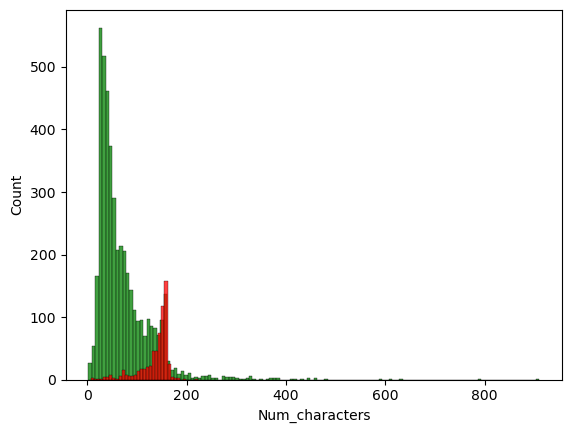

In [32]:
sns.histplot(df[df['Type'] == 0]['Num_characters'],color='green')
sns.histplot(df[df['Type'] == 1]['Num_characters'],color='red')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

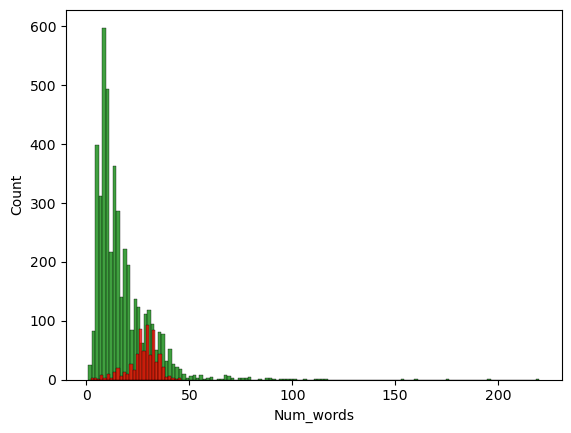

In [33]:
sns.histplot(df[df['Type'] == 0]['Num_words'],color='green')
sns.histplot(df[df['Type'] == 1]['Num_words'],color='red')

<AxesSubplot:xlabel='Num_sentences', ylabel='Count'>

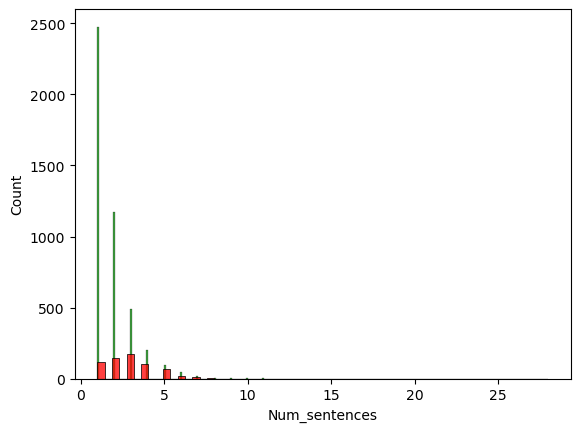

In [34]:
sns.histplot(df[df['Type'] == 0]['Num_sentences'],color='green')
sns.histplot(df[df['Type'] == 1]['Num_sentences'],color='red')

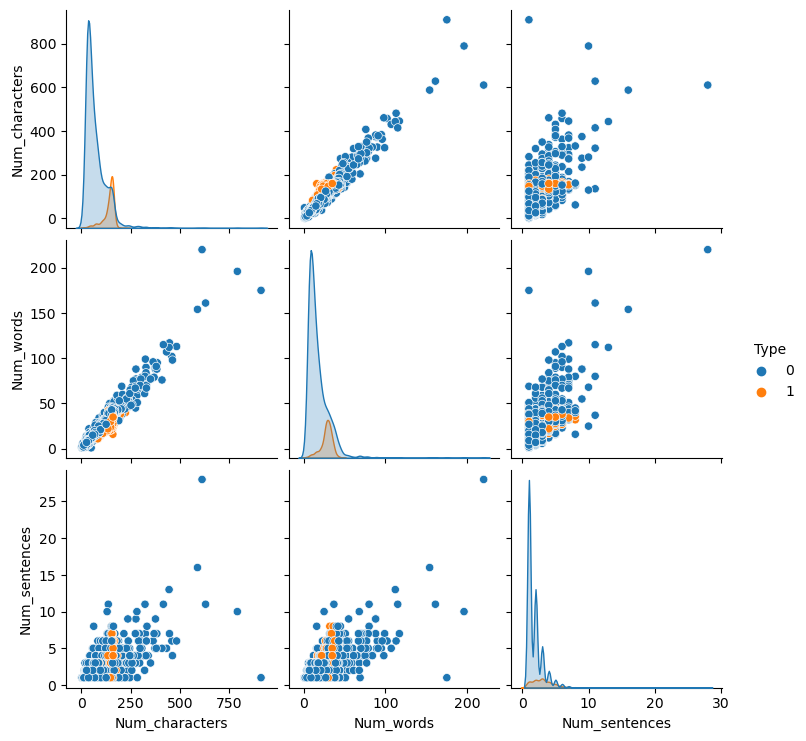

In [35]:
#Let's see the what's the relationship going on between these new columns
sns.pairplot(df,hue='Type')

<AxesSubplot:>

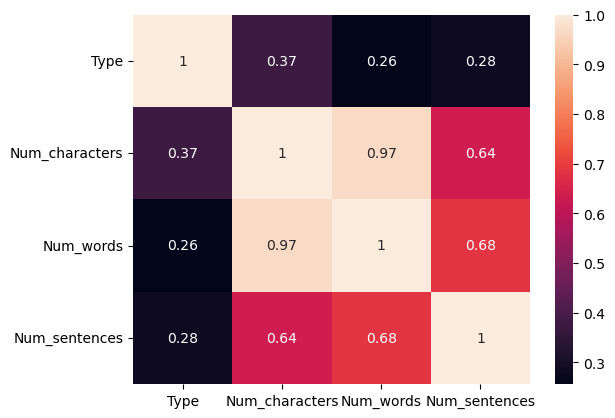

In [36]:
sns.heatmap(df.corr(),annot=True)

# # 3. Data Preprocessing  

In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Liking')

'like'

In [40]:
def  transform_text(Text):
    
 #for Lower case:   
    Text = Text.lower()
    
 #for Tokenization:   
    Text = nltk.word_tokenize(Text)
    
 #for removing special characters:    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
transform_text('You Scored more than 90% in CSE445?')

'score 90 cse445'

In [42]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [43]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [44]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['Transformed_text'] = df['Text'].apply(transform_text)

C:\Users\ROY\AppData\Local\Temp\ipykernel_6356\1235748540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(transform_text)


In [47]:
df.head()

,Type,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
!pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=750, height=750, min_font_size=10, background_color='white')

In [50]:
#Word Cloud for the Spam messages
spam_wc = wc.generate(df[df['Type']==1]['Transformed_text'].str.cat(sep=" "))

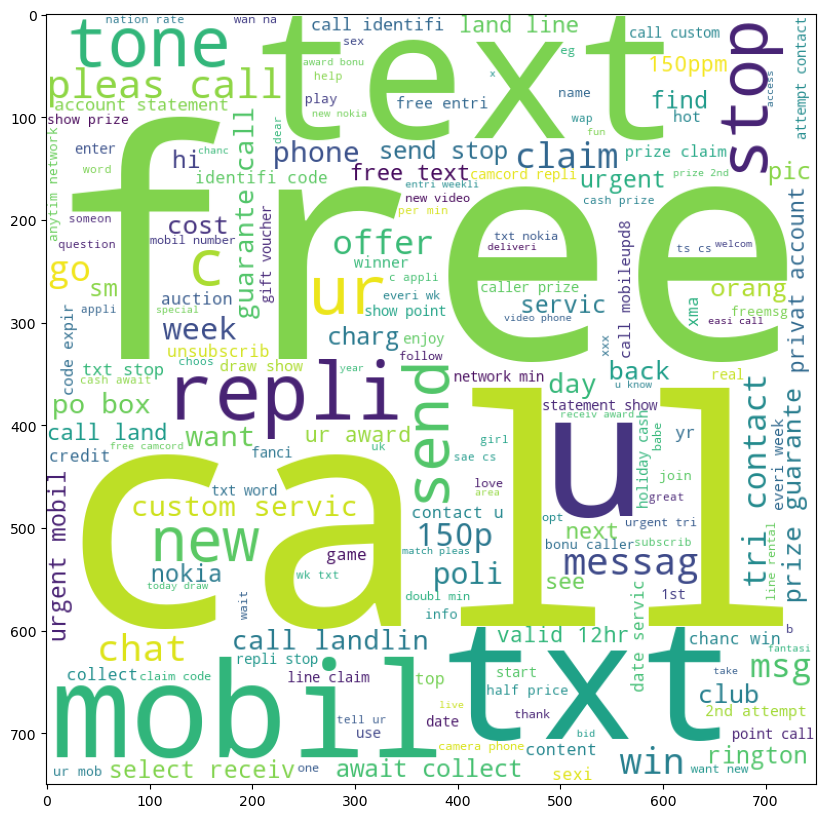

In [51]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [52]:
#Word Cloud for the Ham messages
Ham_wc = wc.generate(df[df['Type']==0]['Transformed_text'].str.cat(sep=" "))

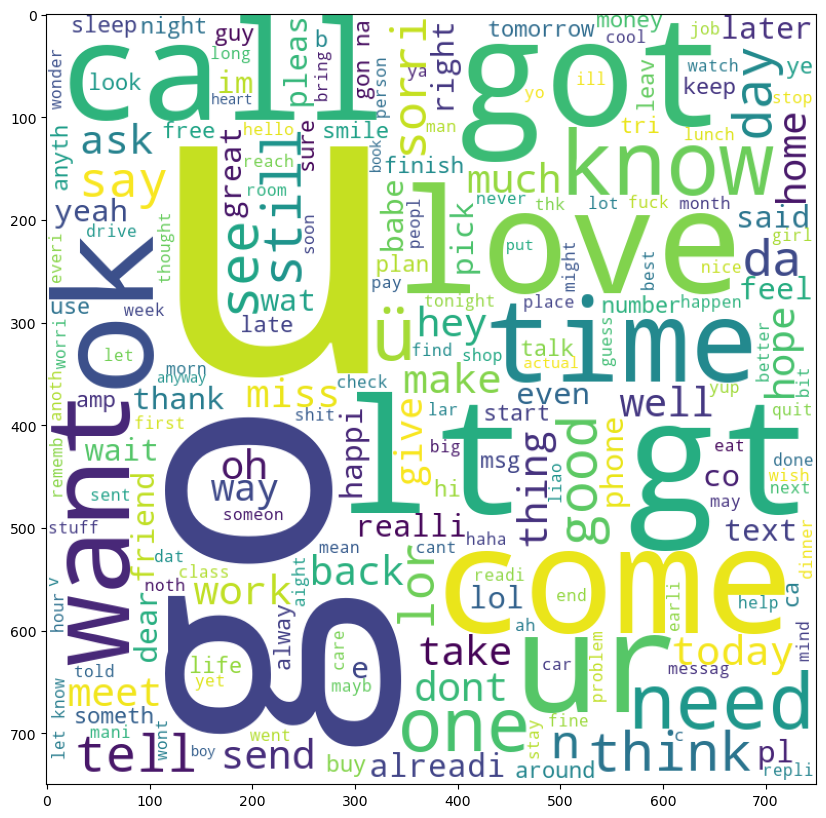

In [53]:
plt.figure(figsize=(15,10))
plt.imshow(Ham_wc)

In [54]:
df.head()

,Type,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus = []
for message in df[df['Type']==1]['Transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [56]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [57]:
len(spam_corpus)

9781

In [58]:
#Listing top 35 words in the spam messages
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(35))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


In [59]:
ham_corpus = []
for message in df[df['Type']==0]['Transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [60]:
#Listing top 35 words in the ham messages
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(35))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


# 4. Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [63]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
X.shape 
#5157--> SMS & 6781--> Words

(5157, 3000)

In [65]:
y = df['Type'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
df

,Type,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))

0.8662790697674418
[[784 121]
 [ 17 110]]
0.47619047619047616
0.8661417322834646


In [73]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0
0.7637795275590551


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771
0.8818897637795275


In [75]:
# we will choose MultinomialNB because the precision is the highest means no False positives
# tfidf --> MNB

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
#abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
#gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    #'AdaBoost': abc, 
    #'BgC': bc, 
    'ETC': etc,
    #'GBDT':gbdt
}

In [79]:
from sklearn.metrics import confusion_matrix
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    
    return accuracy,precision,recall,cm

In [80]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496,
 0.9811320754716981,
 0.8188976377952756,
 array([[903,   2],
        [ 23, 104]], dtype=int64))

In [81]:
train_classifier(knc,X_train,y_train,X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(0.9127906976744186,
 1.0,
 0.29133858267716534,
 array([[905,   0],
        [ 90,  37]], dtype=int64))

In [82]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709302325581395,
 1.0,
 0.7637795275590551,
 array([[905,   0],
        [ 30,  97]], dtype=int64))

In [83]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.936046511627907,
 0.8210526315789474,
 0.6141732283464567,
 array([[888,  17],
        [ 49,  78]], dtype=int64))

In [84]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.9583333333333334,
 0.9375,
 0.7086614173228346,
 array([[899,   6],
        [ 37,  90]], dtype=int64))

In [85]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9738372093023255,
 1.0,
 0.7874015748031497,
 array([[905,   0],
        [ 27, 100]], dtype=int64))

In [86]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(0.9777131782945736,
 0.9905660377358491,
 0.8267716535433071,
 array([[904,   1],
        [ 22, 105]], dtype=int64))

In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall' :recall_scores, 'Confusion Matrix':confusion_matrix}).sort_values('Precision',ascending=False)

NameError: name 'accuracy_scores' is not defined

In [ ]:
performance_df

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('nb', mnb), ('et', etc), ('rf',rfc), ('svm',svc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('nb', mnb), ('et', etc), ('rf',rfc), ('svm',svc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(VotingClassifier,open('model.pkl','wb'))

In [ ]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#True Negative (Top-Left Quadrant)
#False Positive (Top-Right Quadrant)
#False Negative (Bottom-Left Quadrant)
#True Positive (Bottom-Right Quadrant)

In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Recall = metrics.recall_score(actual, predicted)
F1_score = metrics.f1_score(actual, predicted)

In [ ]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

In [ ]:
df
